

Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspot activity cycles are about every eleven years, with some variation in length. Over the solar cycle, sunspot populations rise quickly and then fall more slowly.

The 11-year sunspot cycle is actually half of a longer, 22-year cycle of solar activity. Each time the sunspot count rises and falls, the magnetic field of the Sun associated with sunspots reverses polarity; the orientation of magnetic fields in the Sun's northern and southern hemispheres switch. Thus, in terms of magnetic fields, the solar cycle is only complete (with the fields back the way they were at the start of the cycle) after two 11-year sunspot cycles. This solar cycle is, on average, about 22 years long - twice the duration of the sunspot cycle.


![SUNSPOT](https://www.weather.gov/images/fsd/astro/Sun_sunspot.jpg)

As known the solar activity rises and fallsover an 11 year sunspots activity cycle, moreover it can be shorter or longer 11 years, i.e. the solar cycles can be short as 9 years and long as 14 years; where the sun goes through cycles of high and low activity that repeat every 11 yearsapproximately. The sunspot cycle is a useful way to mark the changes in the sun.

In [131]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

The most recent solar cycle, is cycle 24, began in December, 2008. So, i'm taking data to train till 2008. And the rest till 2019 is the 25th cycle but we also have 2020s data which is split into test

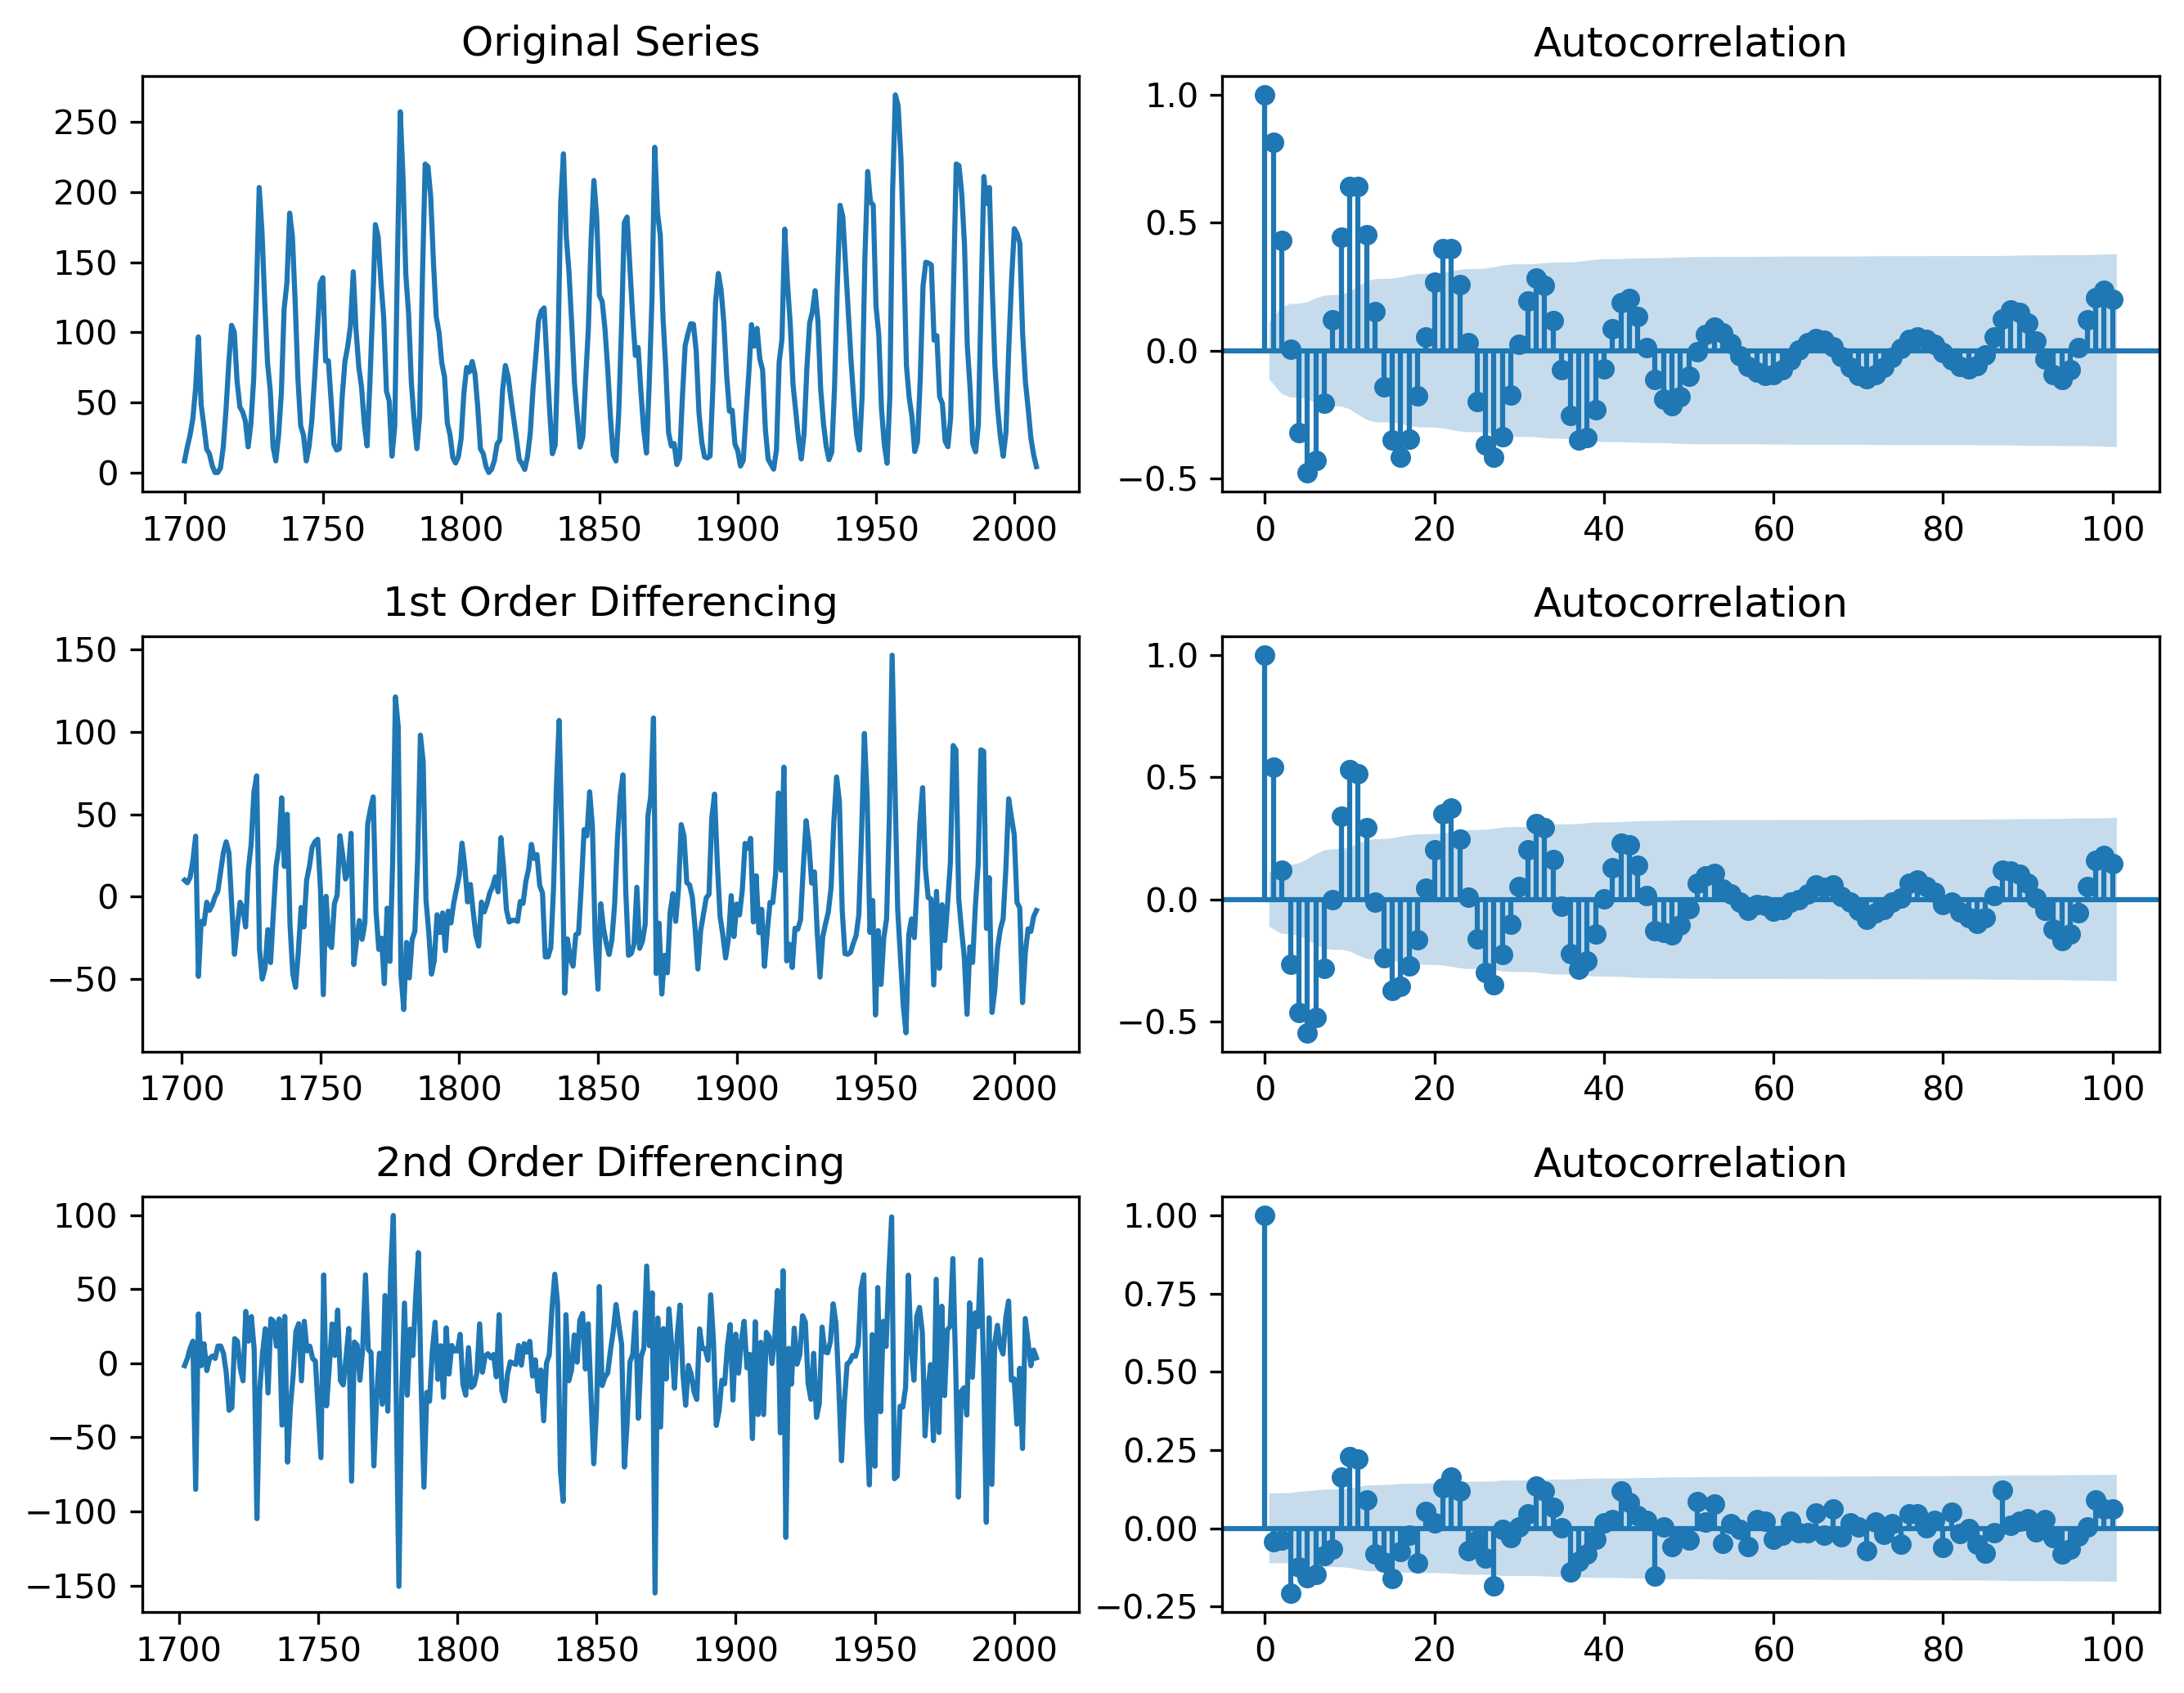

In [132]:
df1= pd.read_fwf('SN_y_tot_V2.0.txt', sep=" ", header=None)
df1.columns = ['Year', 'SN', 'C', 'D'] 
df1.drop(columns=['C', 'D'],inplace=True)
df1['Year']=df1['Year']-0.5
df1.set_index(df1['Year'])
df=df1.iloc[:309:]
test=df1.iloc[309:,]
df.set_index('Year',inplace=True)
test.set_index('Year',inplace=True)
# Original Series
fig, axes = plt.subplots(3, 2,dpi=300)
axes[0, 0].plot(df.SN); axes[0, 0].set_title('Original Series')
plot_acf(df.SN, ax=axes[0, 1],lags=100)

# 1st Differencing
axes[1, 0].plot(df.SN.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.SN.diff().dropna(), ax=axes[1, 1],lags=100)

# 2nd Differencing
axes[2, 0].plot(df.SN.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.SN.diff().diff().dropna(), ax=axes[2, 1],lags=100)
plt.tight_layout()
plt.show()

Autocorrelation plot goes into negative quickly for the 1st and 2nd order differencing. According the website [ARIMA](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/).The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [133]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.SN.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.172482
p-value: 0.021634


The p-value is less than 0.05

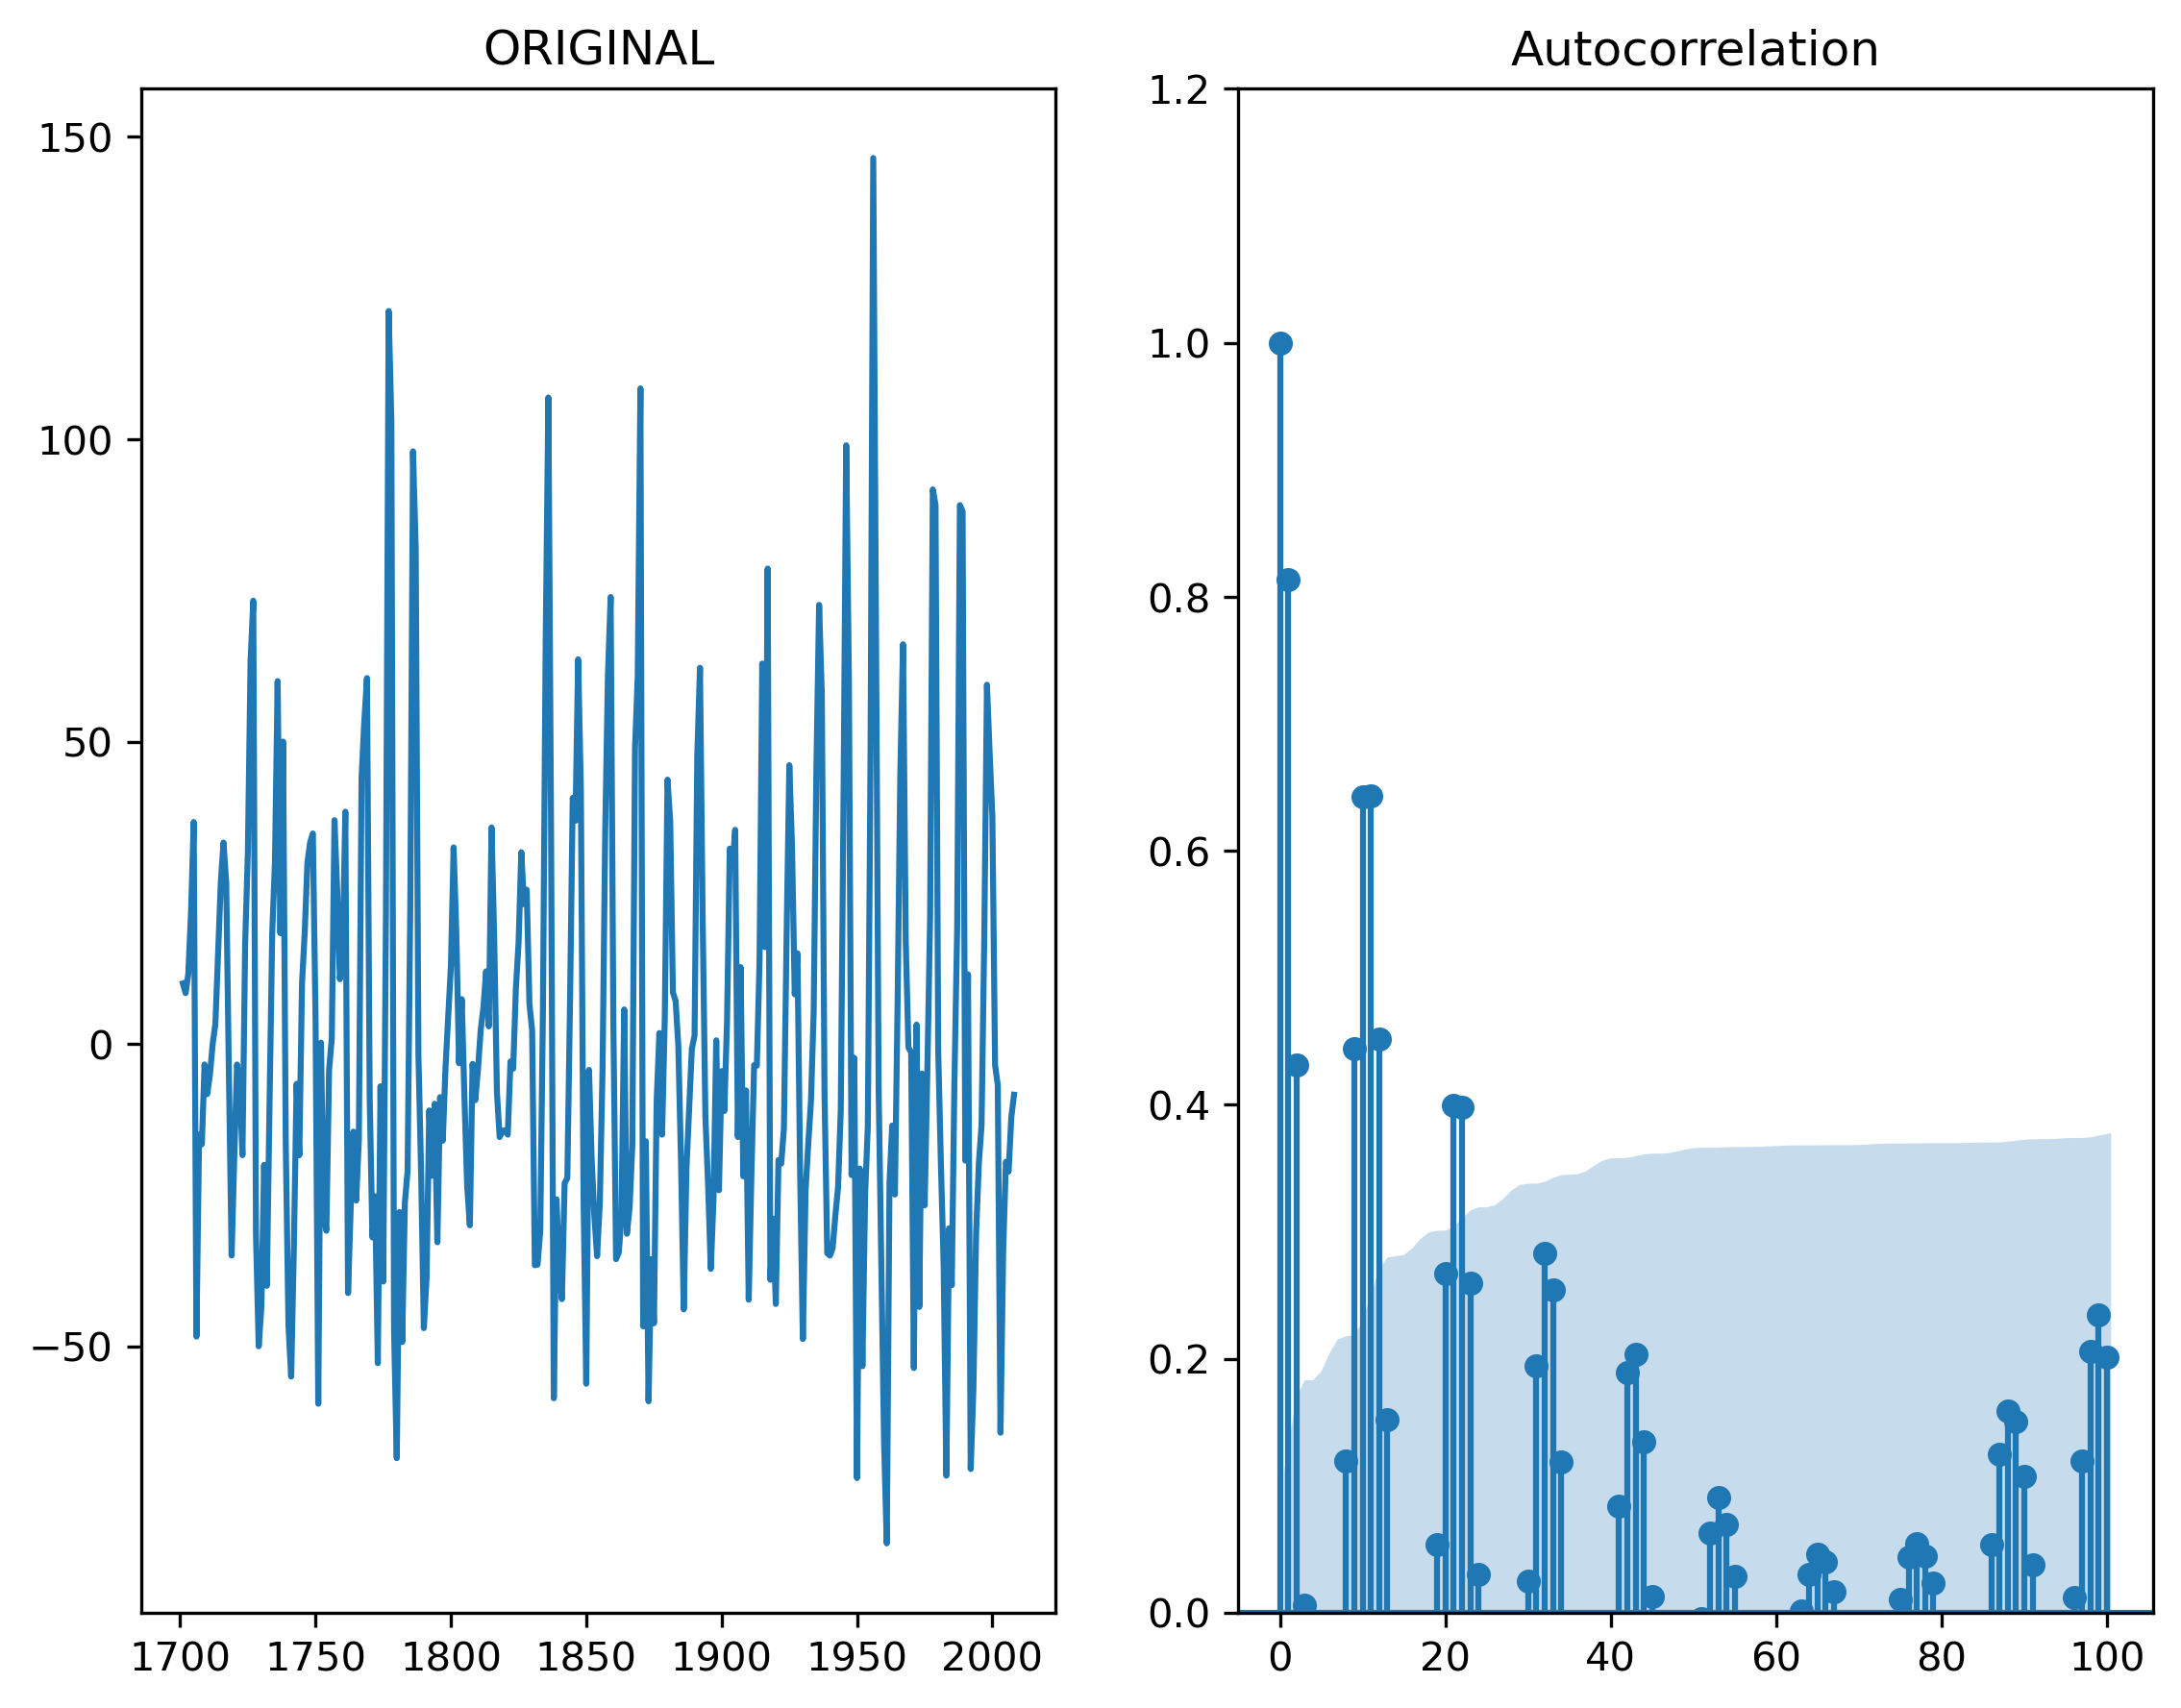

In [134]:
#take d=0 plot pacf det p and from acf determine q
fig, axes = plt.subplots(1, 2,dpi=300)
axes[0].plot(df.SN.diff()); axes[0].set_title('ORIGINAL')
axes[1].set(ylim=(0,1.2))
plot_acf(df.SN.dropna(), ax=axes[1],lags=100)

plt.show()

The Autocorrelation plot goes to zero quickly but there are enough postive values before it. From the results of p value of the test i'm going to take d=0

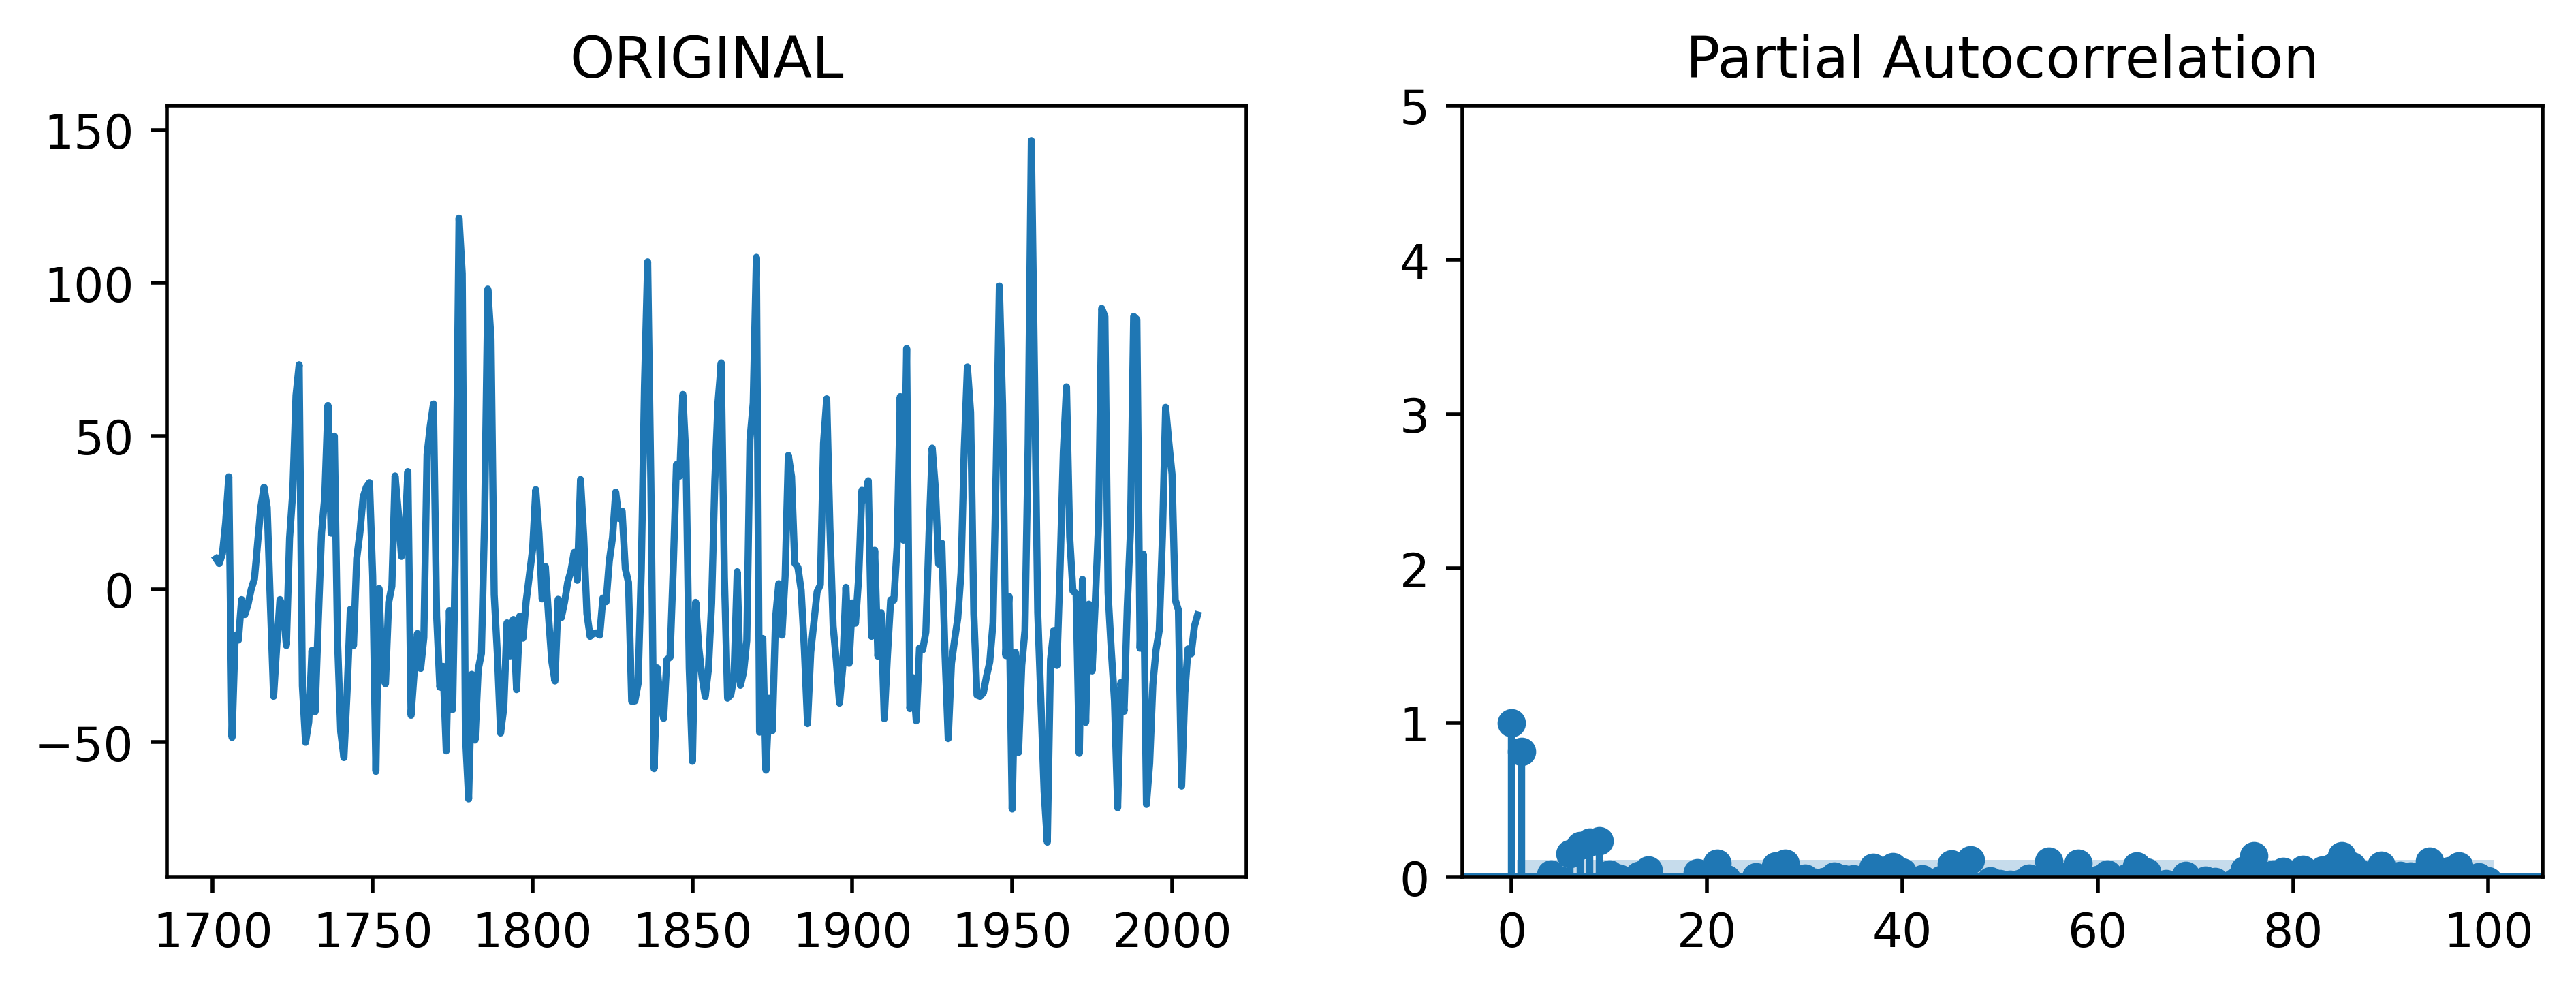

In [135]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2,dpi=500)
axes[0].plot(df.SN.diff()); axes[0].set_title('ORIGINAL')
axes[1].set(ylim=(0,5))
plot_pacf(df.SN.dropna(), ax=axes[1],lags=100)

plt.show()

In [136]:
# The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.
# Couple of lags are well above the significance line. 
# So, let’s tentatively fix q as 2. When in doubt, go with the simpler model that sufficiently explains the Y

from statsmodels.tsa.arima_model import ARIMA

# 3,0,2 ARIMA Model
model = ARIMA(df.SN, order=(3,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

                              ARMA Model Results                              
Dep. Variable:                     SN   No. Observations:                  309
Model:                     ARMA(3, 2)   Log Likelihood               -1423.930
Method:                       css-mle   S.D. of innovations             24.131
Date:                Sun, 07 Mar 2021   AIC                           2861.861
Time:                        00:57:44   BIC                           2887.994
Sample:                             0   HQIC                          2872.309
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.0087      9.062      8.608      0.000      60.247      95.770
ar.L1.SN       2.5514      0.033     76.999      0.000       2.486       2.616
ar.L2.SN      -2.4537      0.056    -44.206      0.0

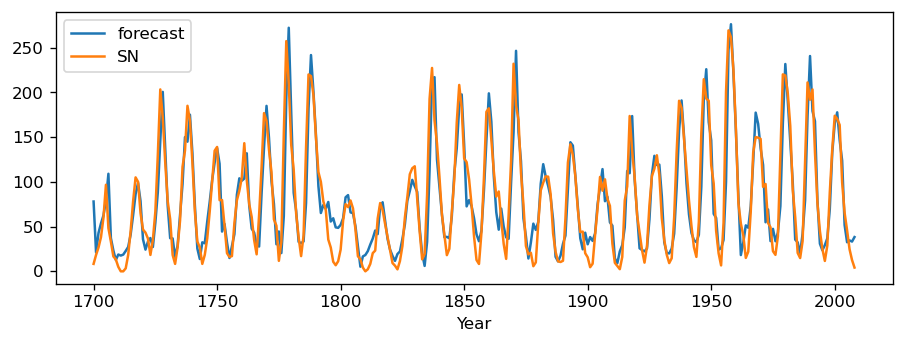

In [137]:
model_fit.plot_predict(dynamic=False)
plt.show()

For smaller values of order p the arima model was coverging to the mean of the data. For higher orders i.e from 3 the model is nearly the same for simplicity i choose p as 3

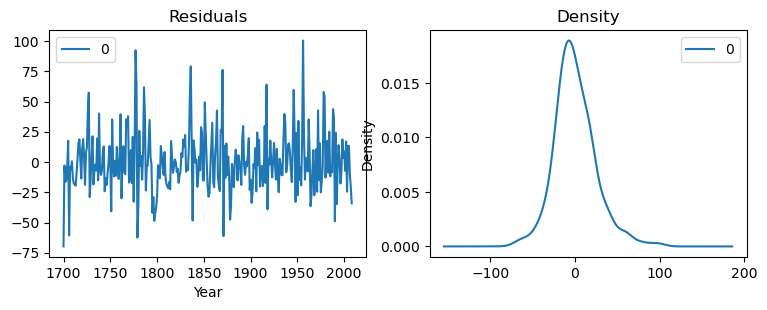

In [138]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,dpi=100)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

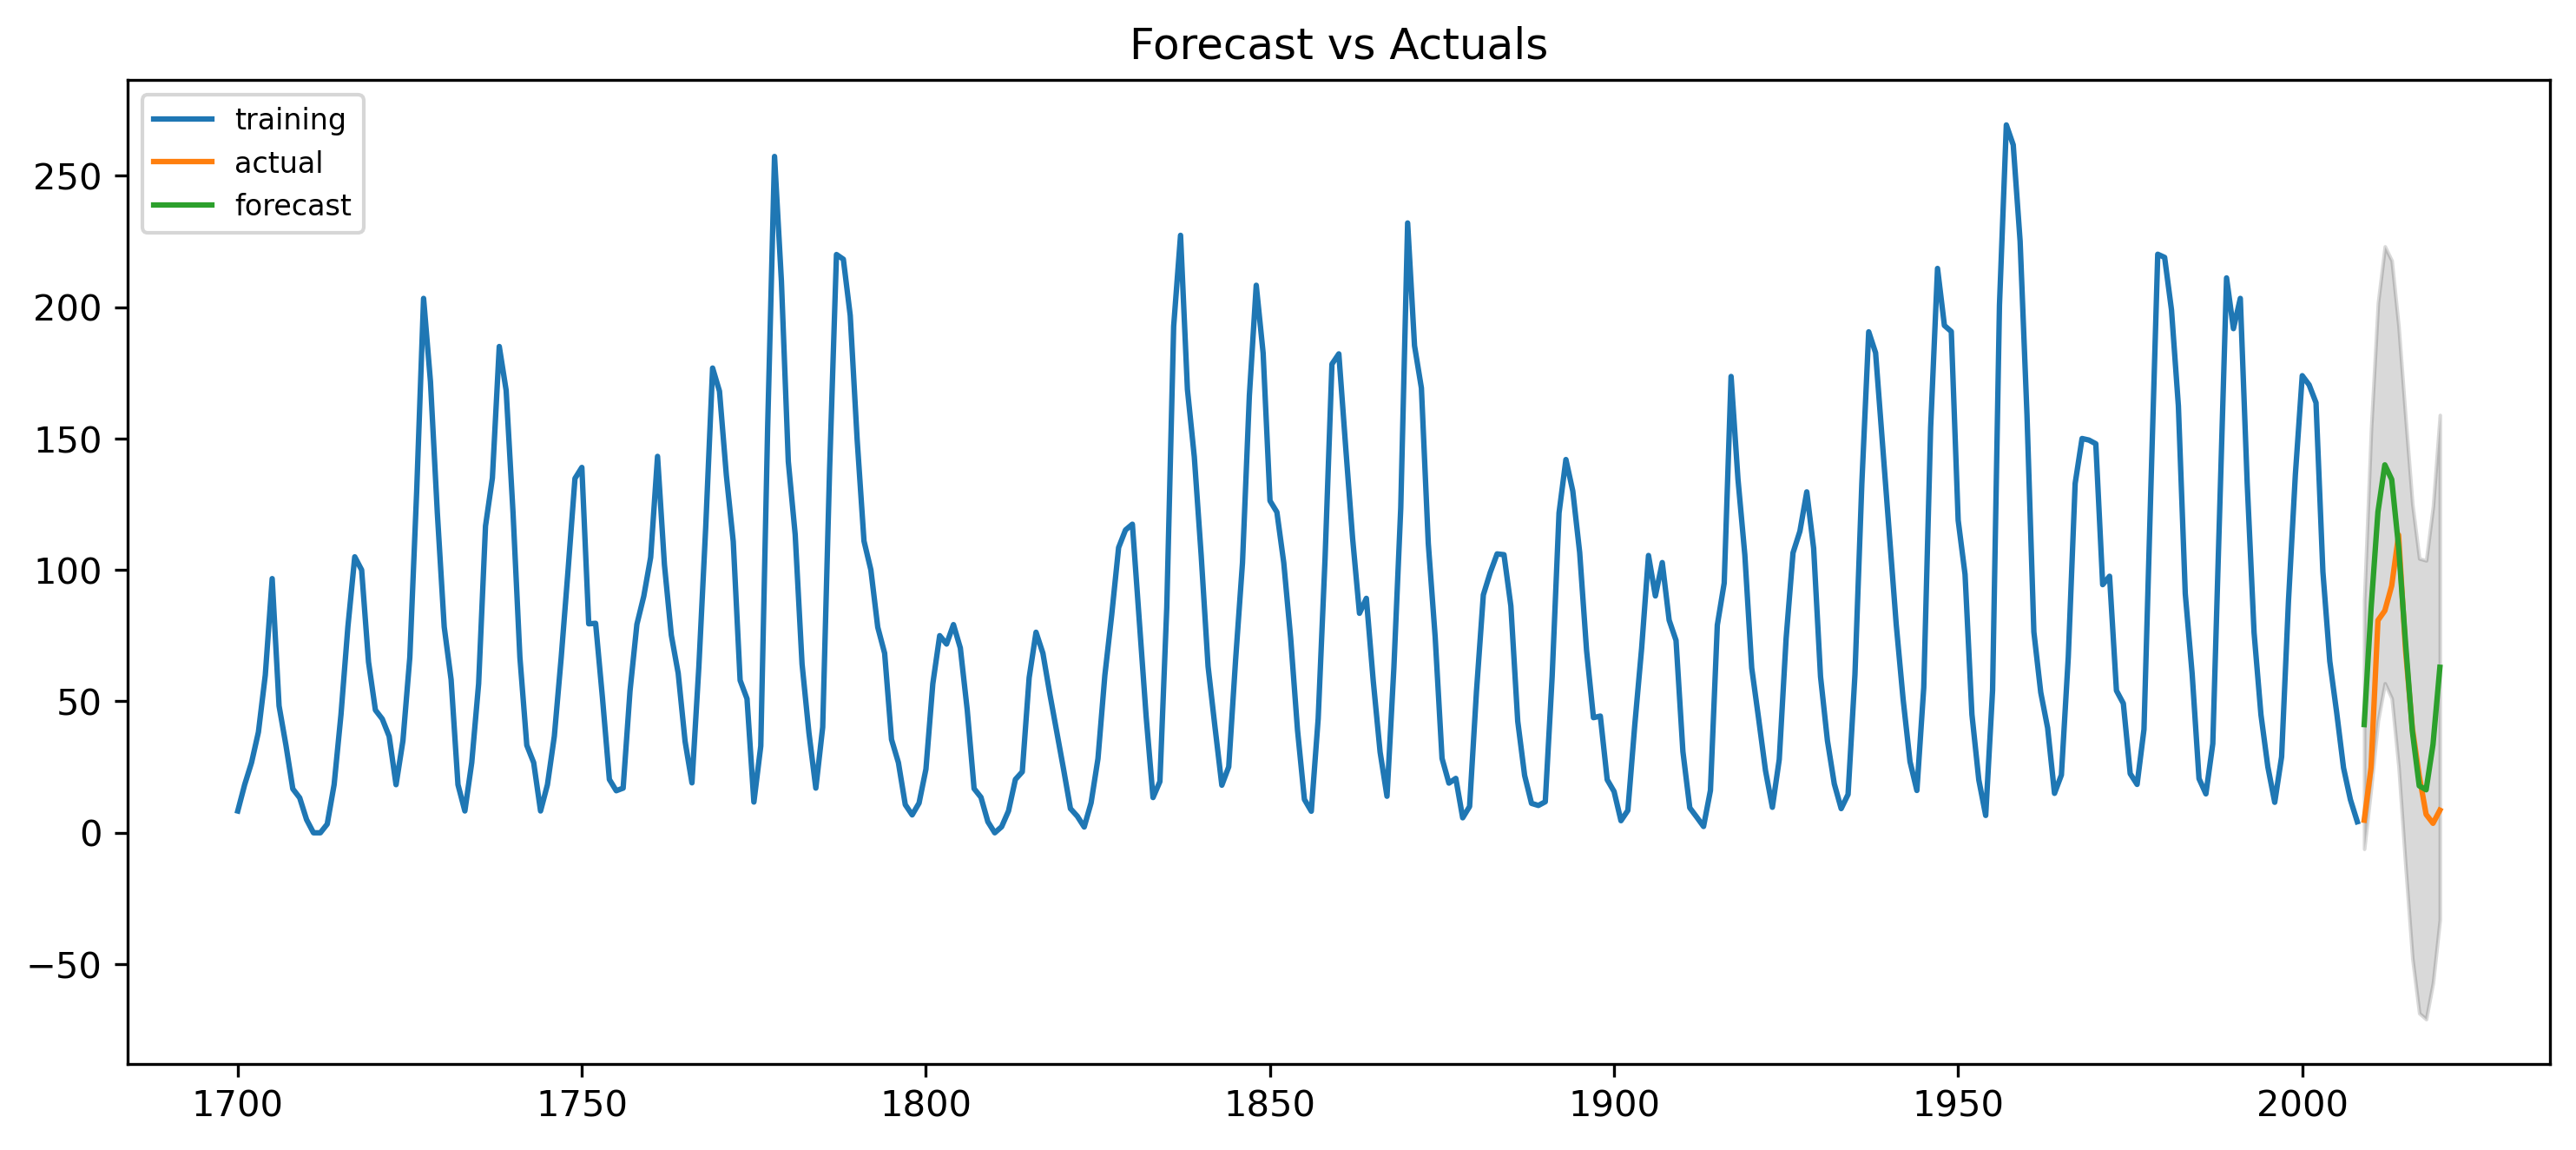

In [139]:
# Build Model
# model = ARIMA(train, order=(3,0,2))  
model = ARIMA(df.SN, order=(3,0,2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(12, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=300)
plt.plot(df.SN, label='training')
plt.plot(test.SN, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The forecast aligns with the actual data os 24 th cycle but the forecast showed it peaks earlier than the acutal peaking year

In [140]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df.SN, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())
#couldnt understand why it gave sarima coeffs

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3014.962, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3732.759, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3114.301, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3395.764, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2979.927, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2981.193, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2902.139, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2977.195, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2868.766, Time=0.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2972.219, Time=0.16 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2976.212, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2973.815, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2895.843, Time=0.22 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 1.840 seconds
                      

Tried using autoarima to find best coefficients

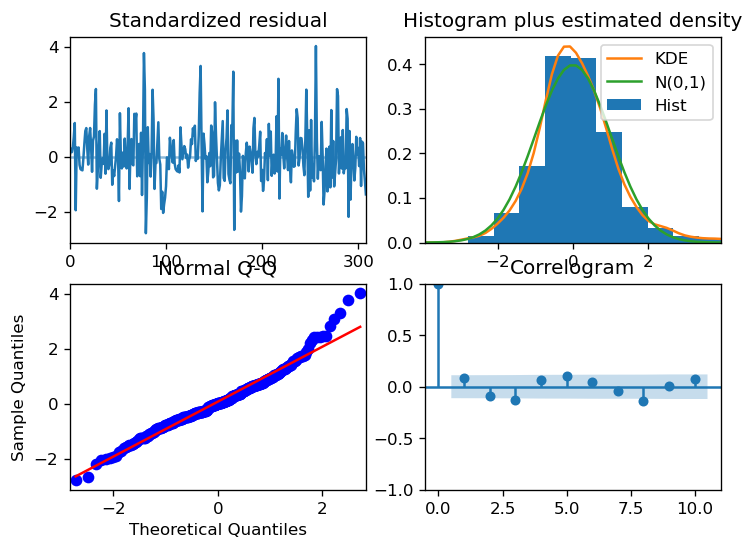

In [141]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast.

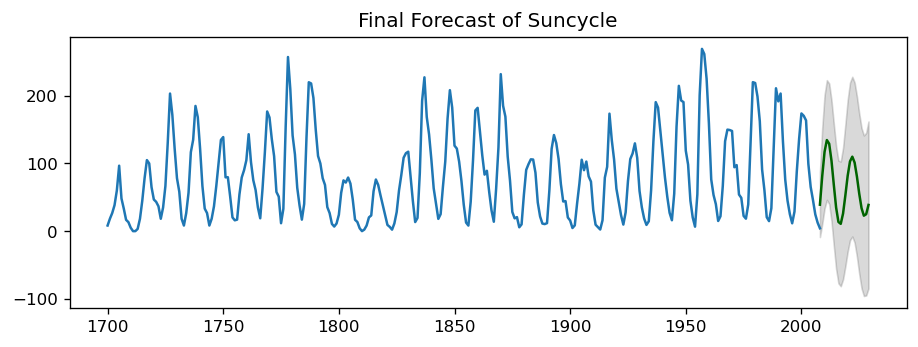

In [142]:
# Forecast
n_periods = 22
fc, confint = model.predict(n_periods=n_periods,start=2009,end=2031, return_conf_int=True)
index_of_fc = np.arange(df.index[-1], df.index[-1]+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.SN)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Suncycle")
plt.show()

In [143]:
fc_series

2008.0     39.090057
2009.0     81.599194
2010.0    117.208255
2011.0    134.608542
2012.0    129.177495
2013.0    104.044374
2014.0     68.557621
2015.0     34.825397
2016.0     13.584725
2017.0     10.790691
2018.0     25.990402
2019.0     52.894045
2020.0     81.811657
2021.0    103.037691
2022.0    110.017062
2023.0    101.274621
2024.0     80.560573
2025.0     55.282275
2026.0     33.847038
2027.0     22.854399
2028.0     25.063420
2029.0     38.746681
dtype: float64

In cycle 24 peak is at 2011 and in cycle 25 peak is at 2022 according to forecast

In [144]:
df.index

Float64Index([1700.0, 1701.0, 1702.0, 1703.0, 1704.0, 1705.0, 1706.0, 1707.0,
              1708.0, 1709.0,
              ...
              1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0,
              2007.0, 2008.0],
             dtype='float64', name='Year', length=309)

In [145]:
test

,SN
Year,
2009.0,4.8
2010.0,24.9
2011.0,80.8
2012.0,84.5
2013.0,94.0
2014.0,113.3
2015.0,69.8
2016.0,39.8
2017.0,21.7


According to our actual data we are slightly off in as the peak is in year 2014 in cycle 24

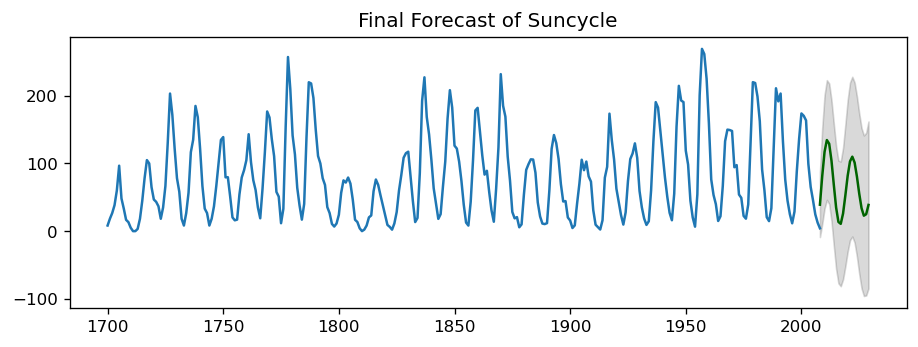

In [146]:
# Forecast
n_periods = 22
fc, confint = model.predict(n_periods=n_periods,start=2009,end=2031, return_conf_int=True)
index_of_fc = np.arange(df.index[-1], df.index[-1]+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.SN)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Suncycle")
plt.show()

The cycle 25 appears to be weaker than the cycle 24 and even the cycle 24 is weaker than the previous ones in terms of the maximum sunspot numbers

In [159]:
t=pd.Series(test.SN)
t

Year
2009.0      4.8
2010.0     24.9
2011.0     80.8
2012.0     84.5
2013.0     94.0
2014.0    113.3
2015.0     69.8
2016.0     39.8
2017.0     21.7
2018.0      7.0
2019.0      3.6
2020.0      8.6
Name: SN, dtype: float64

In [160]:
f=fc_series.iloc[1:13,]

In [161]:
f

2009.0     81.599194
2010.0    117.208255
2011.0    134.608542
2012.0    129.177495
2013.0    104.044374
2014.0     68.557621
2015.0     34.825397
2016.0     13.584725
2017.0     10.790691
2018.0     25.990402
2019.0     52.894045
2020.0     81.811657
dtype: float64

In [162]:
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corrg
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(f, t)


<ipython-input-162-f2986321d997>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-162-f2986321d997>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-162-f2986321d997>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
<ipython-input-162-f2986321d997>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ac

ValueError: Unable to coerce to Series, length must be 1: given 22